In [58]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from analyser import *

plt.style.use('ggplot')

# Data Import

In [59]:
subs = generate_submissions(users=4, pbls=4)
#subs = import_submissions(course_id = "C00198", dbname="test1")

# Binary matrix extraction

In [60]:
bm = bianary_mat(subs)
bm

,U00000,U00001,U00002,U00003
P00000,1,0,0,0
P00001,1,0,0,1
P00002,1,0,1,0
P00003,1,1,0,1


# First Linear Methods

## Initialisation

At the begining, the level of an axis is considered as uniformly distributed.

In [61]:
Difficulties = pd.Series([1.0 for i in range(len(bm.index))], index=bm.index, name='Diff_M1_0')
normalize(Difficulties)

Abilities = pd.Series([1.0 for i in range(len(bm.columns))], index=bm.columns, name='Abilities_M1_0')
normalize(Abilities)

dfAbl_M1 = pd.DataFrame(Abilities)
dfDiff_M1 = pd.DataFrame(Difficulties)

## First Iteration

In [62]:
i=1
Difficulties = process_bianary_mat(bm, Abilities, f=linear1 , name="%s%d" % (Difficulties.name[:-1],i))
Abilities = process_bianary_mat(bm, Difficulties, name="%s%d" % (Abilities.name[:-1],i), Horiz=True)
dfAbl[Abilities.name] = Abilities
dfDiff_M1

,Diff_M1_0
P00000,0.5
P00001,0.5
P00002,0.5
P00003,0.5


In [63]:
i=1
Difficulties = process_bianary_mat(bm, Abilities, f=linear1 , name="%s%d" % (Difficulties.name[:-1],i))
Abilities = process_bianary_mat(bm, Difficulties, name="%s%d" % (Abilities.name[:-1],i), Horiz=True)
dfAbl_M1[Abilities.name] = Abilities
dfDiff_M1[Difficulties.name] = Difficulties

In [64]:
dfDiff

,Diff_M2_0,Diff_M2_1
P00000,0.438026,0.250415
P00001,0.389356,0.572378
P00003,0.637129,0.726479
P00002,0.500601,0.286189


In [65]:
dfAbl_M1

,Abilities_M1_0,Abilities_M1_1
U00000,0.5,0.805333
U00001,0.5,0.274156
U00002,0.5,0.171347
U00003,0.5,0.496908


# Second Linear Method

## Initialisation

In [66]:
pblsLev = succes_means(subs)
UsrLev = succes_means(subs, col_name="user_id")

Difficulties = pd.Series(pblsLev.means, index=bm.index, name='Diff_M2_0')
normalize(Difficulties)
Abilities = pd.Series(UsrLev.means, index=bm.columns, name='Abil_M2_0')
normalize(Abilities)

dfAbl_M2 = pd.DataFrame(Abilities)
dfDiff_M2 = pd.DataFrame(Difficulties)

## First Iteration

In [67]:
i=1
Difficulties = process_bianary_mat(bm, Abilities, f=linear1 , name="%s%d" % (Difficulties.name[:-1],i))
Abilities = process_bianary_mat(bm, Difficulties, name="%s%d" % (Abilities.name[:-1],i), Horiz=True)
dfAbl_M2[Abilities.name] = Abilities
dfDiff_M2[Difficulties.name] = Difficulties

In [68]:
dfDiff_M2

,Diff_M2_0,Diff_M2_1
P00000,0.146735,0.352879
P00001,0.342381,0.529318
P00002,0.29347,0.485208
P00003,0.880409,0.599894


In [69]:
dfAbl_M2

,Abil_M2_0,Abil_M2_1
U00000,0.836059,0.821086
U00001,0.167212,0.250376
U00002,0.313522,0.202510
U00003,0.41803,0.471296


<IPython.core.display.Javascript object>


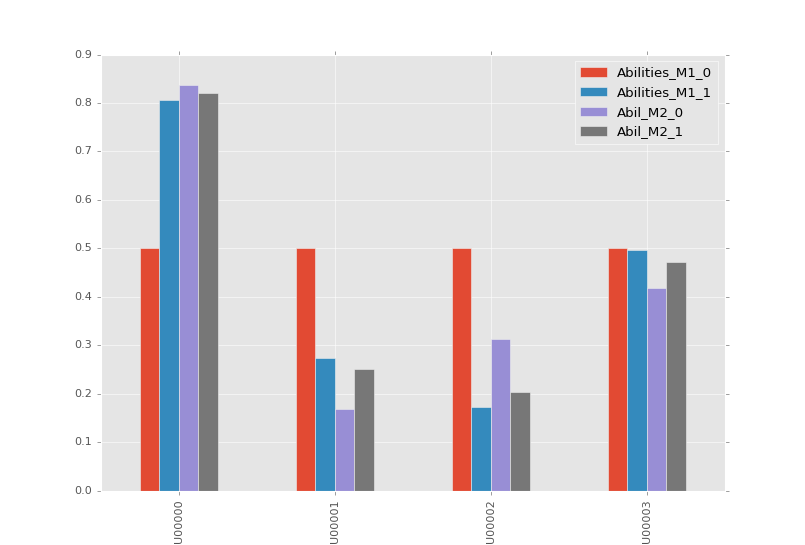

In [72]:
dfAbl_M1.join(dfAbl_M2).plot(kind='bar')

,Abilities_M1_0,Abilities_M1_1
U00000,0.5,0.805333
U00001,0.5,0.274156
U00002,0.5,0.171347
U00003,0.5,0.496908
